# Logistic Regression Unit
- Single Layer Perceptron

## Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

from src import Perceptron


## Training

In [ ]:
perceptron = Perceptron(5, "sigmoid")
def output(a,b,c,d,e):
    return a + 6*b - 9*c + 2*e - 6

N = 9_999_999
X = np.random.uniform(-10, 10, (N, 5))
y = (output(X[:,0], X[:,1], X[:,2], X[:, 3], X[:,4]) > 0).astype(np.float32)

df = pd.DataFrame(X, columns = ["x1", "x2", "x3", "x4", "x5"])
df['y'] = y
epochs = 20
training = df[0:9999000]
testing = df[9999000:]
train_error = []
test_error = []
for epoch in range(epochs):
    perceptron.train(df, "y", batch_size = 999999, lr = 100)
    train_error.append(perceptron.evaluate(training, "y"))
    test_error.append(perceptron.evaluate(testing, "y"))

## Errors

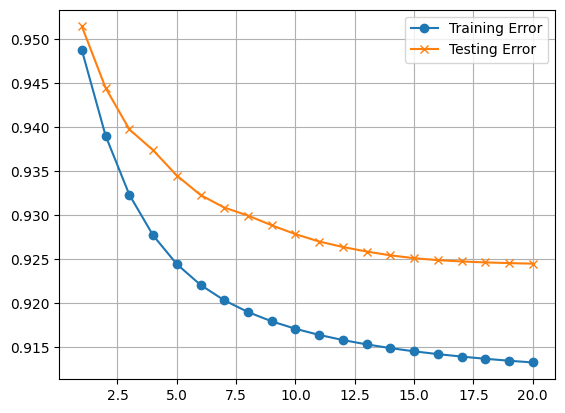

In [3]:
x = np.linspace(1, epochs, num = 20, dtype = int)
train_error = np.array(train_error)
test_error = np.array(test_error)
plt.plot(x, train_error, label = "Training Error", marker = "o")
plt.plot(x, test_error, label = "Testing Error", marker = "x")
plt.legend()
plt.grid(True)
plt.show()